In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import backtest_tools.portfolio_tools as pt

In [52]:
import numpy as np

def simulate_unit_root_process(n: int, c: float, sigma: float):
    """ Simulates a unit root process of length n with parameters c and sigma. 
        Noise element follows normal distribution with a mean of 0.

        References: https://en.wikipedia.org/wiki/Stochastic_drift

    Args:
        n (int): number of simulated variables.
        c (float): drift parameter.
        sigma (float): standard deviation of noise.

    Returns:
        pd.Series: simulated unit root time series with stochastic drift.
    """
    

    y = np.zeros(n)
    y[0] = np.random.randn()  # initial value of the process is a standard normal random variable
    for t in range(1, n):
        y[t] = y[t-1] + c + np.random.normal(loc=0, scale=sigma)
    return y

y = simulate_unit_root_process(n=100, c=0.1, sigma=1)

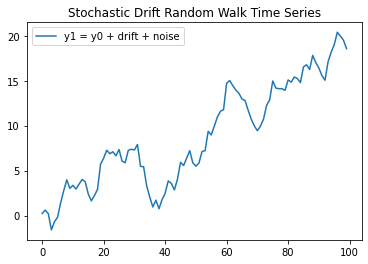

In [53]:
plt.title('Stochastic Drift Random Walk Time Series')
plt.plot(y, label='y1 = y0 + drift + noise')
plt.legend()

In [54]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X=np.arange(0,len(y)).reshape(-1,1), y=y)
y_pred = ols.predict(X=np.arange(0,len(y)).reshape(-1,1))

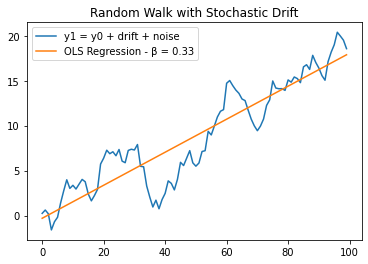

In [55]:
plt.title('Random Walk with Stochastic Drift')
plt.plot(y, label='y1 = y0 + drift + noise')
plt.plot(y_pred, label='OLS Regression - β = 0.33')
plt.legend()

In [56]:
ols.coef_

array([0.18362142])

In [57]:
ols.score(X=np.arange(0,len(y)).reshape(-1,1), y=y)

0.8401012755466315